In [1]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as pltv
import gower
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import altair as alt
alt.data_transformers.enable("vegafusion")

DataTransformerRegistry.enable('vegafusion')

In [2]:
df = pd.read_pickle("../data/processed.pkl")
categorical_columns = df.select_dtypes(include=['category']).columns

In [3]:
# with open("../data/data_element_details.pkl", "rb") as file:
#     data_element_details = pickle.load(file)

In [4]:
# keep_cols = []
# for value in data_element_details.values():
#     if value['Section Name'] in ["Health Care Access", "Chronic Health Conditions"] and value['Label'] in df.columns:
#         keep_cols.append(value['Label'])
# df = df[keep_cols]

In [5]:
import pandas as pd
import prince

# Load the dataset
data = df

# Select the categorical columns for MCA
mca_columns = categorical_columns  # Replace with your categorical column names

# Create an instance of the MCA class
mca = prince.MCA(
    n_components=20,
    n_iter=3,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)

# Fit the MCA model to the data
mca.fit(data[mca_columns])

MCA(n_components=20, n_iter=3, random_state=42)

In [6]:
row_coords = mca.row_coordinates(df)

Attempt 0: k=21
silhouette_avg=0.18661039175375463
Attempt 1: k=22
silhouette_avg=0.16141864432463857
Attempt 2: k=23
silhouette_avg=0.16217138686699495
Attempt 3: k=24
silhouette_avg=0.16098986307047525
Attempt 4: k=25
silhouette_avg=0.135548194425511
Attempt 5: k=26
silhouette_avg=0.19052177736740677
Attempt 6: k=27
silhouette_avg=0.21020977874195967
Attempt 7: k=28
silhouette_avg=0.18491700081965046
Attempt 8: k=29
silhouette_avg=0.20771185595722028
Attempt 9: k=30
silhouette_avg=0.20666456220571727
Attempt 10: k=31
silhouette_avg=0.19730883124451185
Attempt 11: k=32
silhouette_avg=0.19820799495935998
Attempt 12: k=33
silhouette_avg=0.20191864693769293
Attempt 13: k=34
silhouette_avg=0.20563608450861728
Attempt 14: k=35
silhouette_avg=0.20051331156457372
Attempt 15: k=36
silhouette_avg=0.2065826438970259
Attempt 16: k=37
silhouette_avg=0.21034249908920416
Attempt 17: k=38
silhouette_avg=0.19568054766222287
Attempt 18: k=39
silhouette_avg=0.1865280330299647
Attempt 19: k=40
silhouett

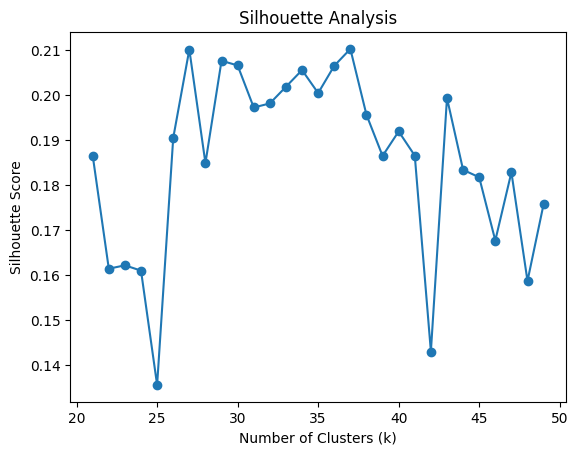

Cluster Labels (Optimal): [11 11 11 ... 15 29 14]
Cluster Centroids (Optimal): [[ 2.49895926e-01 -3.40055024e-02 -1.54937403e-02 -6.89487333e-03
  -1.32629643e-02  4.71684103e-02  4.04059811e-03 -8.89039325e-02
  -1.84712633e-01 -1.37532741e-01 -8.68664826e-04  1.25499930e-01
  -6.76799585e-02  6.55209544e-02  4.83137283e-03  5.12863064e-02
   1.51806026e-02 -5.40773557e-03  7.86024343e-03  2.08232534e-02]
 [-3.32670555e-01 -1.48027950e-01  1.80820341e-01  3.82945292e-04
   2.88845228e-02  2.62283877e-02  2.26050552e-02  6.63352781e-02
   6.92266998e-01 -4.64570043e-01 -8.17221354e-01 -1.09300773e-01
   7.08977414e-02  4.70932960e-01  6.08796224e-02 -1.13575014e-01
   3.75410199e-01 -3.14866957e-01  1.56002981e-02  8.26668531e-02]
 [-4.99680889e-01  2.33406264e-01  2.76253968e-01 -1.24222346e-02
   1.24655456e-02 -1.37319708e-01 -2.26691648e-02 -3.15122350e-02
  -7.72209007e-04  1.73234887e-01 -2.45995987e-02  1.74279350e-02
  -2.04391420e-01 -2.43044722e-01 -1.53674855e-02  3.37569408

In [7]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Specify the range of k values to try
k_values = range(21, 50)

# Initialize an empty list to store the silhouette scores
silhouette_scores = []

# Iterate over each k value
for i, k in enumerate(k_values):
    print(f"Attempt {i}: k={k}")
    # Create a MiniBatchKMeans object with the current k value
    mbk = MiniBatchKMeans(n_clusters=k, batch_size=100, random_state=42)
    
    # Fit the model to the MCA row coordinates
    mbk.fit(row_coords)
    
    # Get the cluster labels for each data point
    labels = mbk.labels_
    
    # Calculate the silhouette score for the current clustering
    silhouette_avg = silhouette_score(row_coords, labels)
    print(f"silhouette_avg={silhouette_avg}")
    
    # Append the silhouette score to the list
    silhouette_scores.append(silhouette_avg)

# Find the optimal number of clusters
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]

# Print the optimal number of clusters
print("The optimal number of clusters based on Silhouette Score is", optimal_k)

# Plot the silhouette scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

# Create a MiniBatchKMeans object with the optimal k value
mbk_optimal = MiniBatchKMeans(n_clusters=optimal_k, batch_size=100, random_state=42)

# Fit the model to the MCA row coordinates
mbk_optimal.fit(row_coords)

# Get the cluster labels for each data point
labels_optimal = mbk_optimal.labels_

# Get the cluster centers
centroids_optimal = mbk_optimal.cluster_centers_

# Print the cluster labels and centroids for the optimal clustering
print("Cluster Labels (Optimal):", labels_optimal)
print("Cluster Centroids (Optimal):", centroids_optimal)

In [8]:
with open('../data/silhouette_scores_2b.pickle', 'wb') as handle:
    pickle.dump(silhouette_scores, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('../data/mbk_optimal_2b.pickle', 'wb') as handle:
    pickle.dump(mbk_optimal, handle, protocol=pickle.HIGHEST_PROTOCOL)